In [14]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(type(housing))
print(dir(housing))

<class 'sklearn.utils.Bunch'>
['DESCR', 'data', 'feature_names', 'target']


In [15]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [16]:
print(type(housing.data))
print(housing.data.shape)

<class 'numpy.ndarray'>
(20640, 8)


In [17]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [18]:
print(type(housing.target))
print(housing.target.shape)

<class 'numpy.ndarray'>
(20640,)


In [19]:
import numpy as np
idx = np.arange(20640)
np.random.shuffle(idx)
x_train = housing.data[idx[:15000]] 
y_train = housing.target[idx[:15000]] 
x_test = housing.data[idx[15000:]] 
y_test = housing.target[idx[15000:]] 
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(15000, 8) (15000,)
(5640, 8) (5640,)


In [20]:
mu = np.mean(x_train, axis=0, keepdims=True)
sigma = np.std(x_train, axis=0, keepdims=True)
x_train = (x_train-mu)/sigma 
x_test = (x_test-mu)/sigma  

In [21]:
import tensorflow as tf
import numpy as np
tf.reset_default_graph()
tf.set_random_seed(0)
np.random.seed(0)

In [22]:
epoch = int(1e3)
lr = 1e-2

In [23]:
import tfgraphviz as tfg

x = tf.placeholder(tf.float32, [None, 8])
y = tf.placeholder(tf.float32, [None])

init_w = tf.keras.initializers.VarianceScaling(mode='fan_avg')
init_b = tf.keras.initializers.zeros()
w = tf.get_variable("w", [8, 1], tf.float32, init_w)
b = tf.get_variable("b", [], tf.float32, init_b)
y_pred = x@w+b

error = y_pred - tf.reshape(y, (-1,1))
loss = tf.reduce_mean(tf.square(error), name="loss")
opt = tf.train.GradientDescentOptimizer(learning_rate=lr)
train = opt.minimize(loss)

init = tf.global_variables_initializer()

g = tfg.board(tf.get_default_graph())
g.view()

'G.gv.pdf'

In [24]:
with tf.Session() as sess:
    init.run()
    loss_trace = []
    for _ in range(epoch):
        feed_dict = {x: x_train, y: y_train}
        loss_run, _ = sess.run([loss, train], feed_dict=feed_dict)
        loss_trace.append(loss_run)
    feed_dict = {x: x_test}
    y_test_pred = sess.run(y_pred, feed_dict=feed_dict)

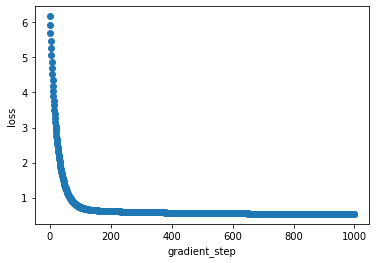

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(loss_trace, 'o')
plt.xlabel('gradient_step')
plt.ylabel('loss')
plt.show()

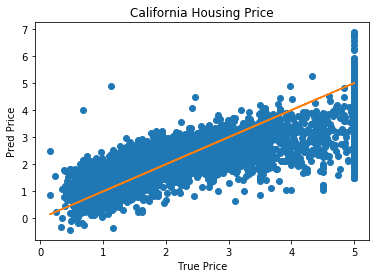

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(y_test, y_test_pred.reshape((-1,)), 'o')
plt.plot(y_test, y_test)
plt.xlabel('True Price')
plt.ylabel('Pred Price')
plt.title('California Housing Price')
plt.show()